In [ ]:
import librosa as lt

In [ ]:
import numpy as np
import time
import os
path = r'C:\Users\arjun\Downloads\107620_256618_bundle_archive'
lst = []

start_time = time.time()

for subdir, dirs, files in os.walk(path):
    for file in files:
        try:
        #Load librosa array, obtain mfcss, store the file and the mcss information in a new array
            X, sample_rate = lt.load(os.path.join(subdir,file), res_type='kaiser_fast')
            mfccs = np.mean(lt.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0) 
        # The instruction below converts the labels (from 1 to 8) to a series from 0 to 7
        # This is because our predictor needs to start from 0 otherwise it will try to predict also 0.
            file = int(file[7:8]) - 1 
            arr = mfccs, file
            lst.append(arr)
      # If the file is not valid, skip it
        except ValueError:
             continue

print("--- Data loaded. Loading time: %s seconds ---" % (time.time() - start_time))

--- Data loaded. Loading time: 191.14838361740112 seconds ---


In [ ]:
X, y = zip(*lst)

In [ ]:
import numpy as np
X = np.asarray(X)
y = np.asarray(y)


X.shape, y.shape

((2880, 40), (2880,))

In [ ]:
import joblib

X_name = 'X.joblib'
y_name = 'y.joblib'
save_dir = r'C:\Users\arjun\Downloads\107620_256618_bundle_archive'

savedX = joblib.dump(X, os.path.join(save_dir, X_name))
savedy = joblib.dump(y, os.path.join(save_dir, y_name))

In [ ]:
import joblib
X = joblib.load(r'C:\Users\arjun\Downloads\107620_256618_bundle_archive/X.joblib')
y = joblib.load(r'C:\Users\arjun\Downloads\107620_256618_bundle_archive/y.joblib')


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtree = DecisionTreeClassifier()

In [ ]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
predictions = dtree.predict(X_test)

In [ ]:

from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.67      0.74        73
           1       0.77      0.85      0.81       124
           2       0.80      0.73      0.77       135
           3       0.76      0.80      0.78       109
           4       0.74      0.80      0.77       112
           5       0.82      0.80      0.81       133
           6       0.79      0.77      0.78       133
           7       0.77      0.77      0.77       132

    accuracy                           0.78       951
   macro avg       0.78      0.78      0.78       951
weighted avg       0.78      0.78      0.78       951



In [ ]:
import numpy as np
x_traincnn = np.expand_dims(X_train, axis=2)
x_testcnn = np.expand_dims(X_test, axis=2)

In [ ]:
x_traincnn.shape, x_testcnn.shape

((1929, 40, 1), (951, 40, 1))

In [ ]:

import keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow 
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import RMSprop

model = Sequential()

model.add(Conv1D(64, 5,padding='same',
                 input_shape=(40,1)))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(4)))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(4)))
model.add(Conv1D(256, 5,padding='same',))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(8))
model.add(Activation('softmax'))
opt = tensorflow.keras.optimizers.RMSprop(
    learning_rate=0.001, rho=0.9, momentum=0.0, epsilon=1e-07, centered=False,
    name='RMSprop')


In [ ]:

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_9 (Conv1D)            (None, 40, 64)            384       
_________________________________________________________________
activation_12 (Activation)   (None, 40, 64)            0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 40, 64)            0         
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 10, 64)            0         
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 10, 128)           41088     
_________________________________________________________________
activation_13 (Activation)   (None, 10, 128)           0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 10, 128)          

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [ ]:

arjun=model.fit(x_traincnn, y_train, batch_size=16, epochs=100, validation_data=(x_testcnn, y_test))

Epoch 1/100
121/121 [==============================] - 1s 7ms/step - loss: 3.5468 - accuracy: 0.1840 - val_loss: 2.0349 - val_accuracy: 0.2250
Epoch 2/100
121/121 [==============================] - 1s 6ms/step - loss: 1.9617 - accuracy: 0.2379 - val_loss: 1.8810 - val_accuracy: 0.2723
Epoch 3/100
121/121 [==============================] - 1s 6ms/step - loss: 1.8524 - accuracy: 0.2846 - val_loss: 1.7628 - val_accuracy: 0.3417
Epoch 4/100
121/121 [==============================] - 1s 6ms/step - loss: 1.7327 - accuracy: 0.3427 - val_loss: 1.6855 - val_accuracy: 0.3449
Epoch 5/100
121/121 [==============================] - 1s 6ms/step - loss: 1.6477 - accuracy: 0.3815 - val_loss: 1.7759 - val_accuracy: 0.3502
Epoch 6/100
121/121 [==============================] - 1s 6ms/step - loss: 1.5590 - accuracy: 0.4220 - val_loss: 1.5292 - val_accuracy: 0.4374
Epoch 7/100
121/121 [==============================] - 1s 6ms/step - loss: 1.4876 - accuracy: 0.4676 - val_loss: 1.5736 - val_accuracy: 0.4217

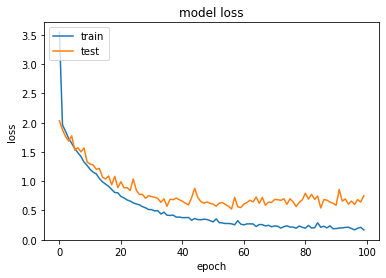

In [ ]:
plt.plot(arjun.history['loss'])
plt.plot(arjun.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

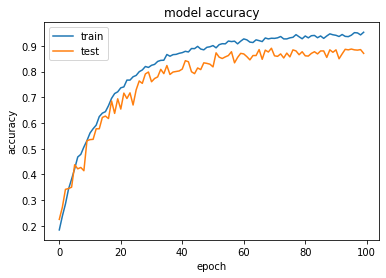

In [ ]:
plt.plot(arjun.history['accuracy'])
plt.plot(arjun.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
predictions = model.predict_classes(x_testcnn)

In [ ]:
predictions

array([6, 2, 0, 5, 2, 7, 6, 4, 6, 0, 2, 3, 1, 3, 5, 1, 2, 7, 4, 7, 7, 3,
       1, 4, 5, 2, 3, 6, 2, 7, 4, 3, 4, 7, 4, 2, 2, 3, 7, 1, 4, 4, 0, 4,
       3, 6, 0, 7, 7, 2, 6, 3, 3, 2, 3, 0, 3, 0, 2, 6, 7, 7, 6, 6, 3, 5,
       1, 5, 7, 1, 1, 2, 4, 4, 2, 1, 2, 6, 4, 5, 5, 5, 4, 0, 7, 6, 7, 0,
       1, 4, 6, 4, 5, 4, 7, 7, 2, 1, 1, 6, 2, 6, 2, 5, 1, 4, 4, 4, 5, 1,
       0, 3, 2, 4, 5, 4, 7, 7, 5, 7, 3, 3, 6, 3, 5, 5, 2, 2, 6, 4, 0, 7,
       2, 1, 7, 5, 4, 3, 7, 7, 6, 4, 2, 2, 7, 5, 2, 5, 7, 6, 0, 4, 0, 2,
       7, 1, 0, 5, 4, 3, 6, 2, 3, 1, 4, 3, 1, 7, 1, 5, 3, 6, 4, 5, 4, 0,
       6, 7, 7, 0, 4, 7, 5, 6, 2, 6, 6, 2, 3, 6, 6, 2, 5, 7, 3, 4, 1, 0,
       5, 7, 4, 2, 7, 4, 3, 3, 5, 4, 0, 1, 5, 4, 7, 3, 5, 4, 5, 5, 7, 2,
       7, 6, 0, 2, 4, 4, 6, 5, 2, 1, 3, 7, 1, 1, 0, 0, 5, 3, 1, 5, 6, 6,
       6, 7, 7, 1, 1, 5, 1, 5, 5, 7, 3, 3, 3, 1, 2, 1, 7, 5, 6, 5, 2, 1,
       0, 1, 2, 3, 5, 7, 3, 1, 2, 2, 1, 7, 5, 7, 1, 1, 4, 5, 2, 5, 4, 4,
       7, 6, 7, 7, 1, 1, 5, 6, 7, 5, 6, 0, 3, 4, 4,

In [ ]:
y_test

array([6, 2, 5, 5, 2, 7, 6, 4, 6, 0, 2, 3, 1, 3, 5, 0, 2, 7, 4, 7, 7, 3,
       1, 4, 5, 2, 3, 6, 2, 7, 6, 1, 4, 6, 4, 2, 2, 1, 7, 1, 4, 4, 0, 4,
       3, 6, 0, 7, 7, 2, 6, 3, 3, 2, 3, 1, 3, 0, 2, 6, 7, 7, 6, 6, 3, 5,
       0, 2, 7, 1, 1, 2, 4, 6, 2, 1, 6, 6, 4, 2, 3, 5, 4, 2, 7, 6, 7, 1,
       1, 3, 6, 4, 5, 4, 2, 7, 2, 1, 1, 4, 2, 6, 2, 5, 1, 4, 4, 4, 5, 1,
       0, 3, 2, 4, 5, 4, 7, 7, 5, 7, 3, 3, 6, 3, 5, 6, 2, 2, 6, 4, 0, 7,
       2, 1, 7, 3, 4, 5, 7, 7, 6, 4, 2, 2, 7, 5, 2, 5, 7, 6, 0, 4, 0, 2,
       7, 1, 0, 5, 4, 0, 6, 2, 2, 1, 4, 3, 1, 7, 1, 5, 3, 6, 4, 5, 4, 0,
       6, 7, 7, 0, 4, 4, 5, 6, 5, 6, 6, 2, 3, 6, 6, 2, 5, 7, 3, 6, 1, 0,
       7, 7, 4, 2, 7, 4, 3, 3, 5, 4, 0, 1, 5, 4, 7, 3, 5, 4, 7, 5, 7, 2,
       7, 6, 0, 2, 4, 4, 6, 5, 2, 1, 3, 7, 1, 1, 2, 0, 5, 3, 1, 5, 6, 6,
       6, 7, 7, 0, 1, 5, 1, 5, 5, 4, 0, 0, 3, 1, 6, 1, 7, 5, 6, 2, 2, 1,
       0, 3, 2, 3, 5, 7, 3, 1, 2, 2, 1, 7, 5, 7, 1, 1, 4, 5, 2, 2, 6, 3,
       6, 6, 7, 7, 1, 1, 5, 6, 7, 5, 6, 0, 3, 4, 4,

In [ ]:
new_ytest = y_test.astype(int)

In [ ]:
new_ytest

array([6, 2, 5, 5, 2, 7, 6, 4, 6, 0, 2, 3, 1, 3, 5, 0, 2, 7, 4, 7, 7, 3,
       1, 4, 5, 2, 3, 6, 2, 7, 6, 1, 4, 6, 4, 2, 2, 1, 7, 1, 4, 4, 0, 4,
       3, 6, 0, 7, 7, 2, 6, 3, 3, 2, 3, 1, 3, 0, 2, 6, 7, 7, 6, 6, 3, 5,
       0, 2, 7, 1, 1, 2, 4, 6, 2, 1, 6, 6, 4, 2, 3, 5, 4, 2, 7, 6, 7, 1,
       1, 3, 6, 4, 5, 4, 2, 7, 2, 1, 1, 4, 2, 6, 2, 5, 1, 4, 4, 4, 5, 1,
       0, 3, 2, 4, 5, 4, 7, 7, 5, 7, 3, 3, 6, 3, 5, 6, 2, 2, 6, 4, 0, 7,
       2, 1, 7, 3, 4, 5, 7, 7, 6, 4, 2, 2, 7, 5, 2, 5, 7, 6, 0, 4, 0, 2,
       7, 1, 0, 5, 4, 0, 6, 2, 2, 1, 4, 3, 1, 7, 1, 5, 3, 6, 4, 5, 4, 0,
       6, 7, 7, 0, 4, 4, 5, 6, 5, 6, 6, 2, 3, 6, 6, 2, 5, 7, 3, 6, 1, 0,
       7, 7, 4, 2, 7, 4, 3, 3, 5, 4, 0, 1, 5, 4, 7, 3, 5, 4, 7, 5, 7, 2,
       7, 6, 0, 2, 4, 4, 6, 5, 2, 1, 3, 7, 1, 1, 2, 0, 5, 3, 1, 5, 6, 6,
       6, 7, 7, 0, 1, 5, 1, 5, 5, 4, 0, 0, 3, 1, 6, 1, 7, 5, 6, 2, 2, 1,
       0, 3, 2, 3, 5, 7, 3, 1, 2, 2, 1, 7, 5, 7, 1, 1, 4, 5, 2, 2, 6, 3,
       6, 6, 7, 7, 1, 1, 5, 6, 7, 5, 6, 0, 3, 4, 4,

In [ ]:
from sklearn.metrics import classification_report
report = classification_report(new_ytest, predictions)
print(report)

              precision    recall  f1-score   support

           0       0.83      0.74      0.78        73
           1       0.84      0.93      0.88       124
           2       0.92      0.81      0.86       135
           3       0.80      0.87      0.83       109
           4       0.89      0.91      0.90       112
           5       0.80      0.92      0.86       133
           6       0.97      0.86      0.91       133
           7       0.92      0.88      0.90       132

    accuracy                           0.87       951
   macro avg       0.87      0.86      0.87       951
weighted avg       0.88      0.87      0.87       951



In [ ]:

from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(new_ytest, predictions)
print (matrix)

[[ 54   9   2   8   0   0   0   0]
 [  5 115   0   4   0   0   0   0]
 [  2   0 109   2   0  18   0   4]
 [  0   6   0  95   2   4   2   0]
 [  0   0   0   2 102   2   2   4]
 [  2   0   2   6   0 123   0   0]
 [  0   5   4   0   6   2 114   2]
 [  2   2   2   2   4   4   0 116]]


In [ ]:
model.save('testing_model.h5')
print("MODEL SAVED")

MODEL SAVED


In [ ]:
import keras
import numpy as np
import librosa

class livePredictions:

    def __init__(self, path, file):
   
        self.path = path
        self.file = file

    def load_model(self):
      
        self.loaded_model = keras.models.load_model(self.path)
        return self.loaded_model.summary()

    def makepredictions(self):
   
        data, sampling_rate = librosa.load(self.file)
        mfccs = np.mean(librosa.feature.mfcc(y=data, sr=sampling_rate, n_mfcc=40).T, axis=0)
        x = np.expand_dims(mfccs, axis=1)
        x = np.expand_dims(x, axis=0)
        predictions = self.loaded_model.predict_classes(x)
        print("Prediction is", " ", self.convertclasstoemotion(predictions))

    @staticmethod
    def convertclasstoemotion(pred):
   
        label_conversion = {'0': 'neutral',
                            '1': 'calm',
                            '2': 'happy',
                            '3': 'sad',
                            '4': 'angry',
                            '5': 'fearful',
                            '6': 'disgust',
                            '7': 'surprised'}

        for key, value in label_conversion.items():
            if int(key) == pred:
                label = value
        return label

pred = livePredictions(path=r'testing_model.h5',file=r'E:\movies\ace\Actor_14\03-01-04-02-02-02-14.wav')

pred.load_model()
pred.makepredictions()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_9 (Conv1D)            (None, 40, 64)            384       
_________________________________________________________________
activation_12 (Activation)   (None, 40, 64)            0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 40, 64)            0         
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 10, 64)            0         
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 10, 128)           41088     
_________________________________________________________________
activation_13 (Activation)   (None, 10, 128)           0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 10, 128)          

In [ ]:
from IPython.display import Audio

In [ ]:
Audio(r'E:\movies\ace\Actor_14\03-01-04-02-02-02-14.wav')